In [47]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
import torchvision.transforms.functional as F  

In [25]:
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open(Path('data/test_frames/images') / '9BC6ssCjyfg_00176_13.jpg')
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
orig_mask = Image.open(Path('data/test_frames/masks') / '9BC6ssCjyfg_00176_13_mask.png')
torch.manual_seed(0)

/var/folders/dw/7tm1q4x11050glbyf9ddhmyr0000gn/T/ipykernel_39168/959695039.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/sbroome/Documents/projects/diver-segmentation/data/test_frames/images/9BC6ssCjyfg_00176_13.jpg'>
  orig_img = Image.open(Path('data/test_frames/images') / '9BC6ssCjyfg_00176_13.jpg')


In [9]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False, figsize=(18,9))
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

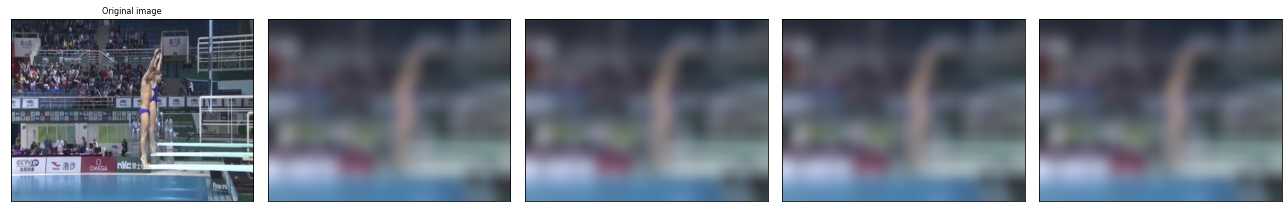

In [23]:
blurrer = T.GaussianBlur(kernel_size=(55, 55), sigma=(15.0))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

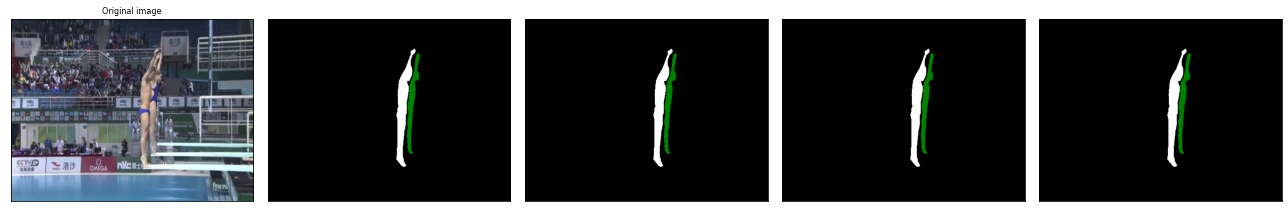

In [28]:
plot([orig_mask]*4)

In [34]:
to_tensor = T.ToTensor()
masks = to_tensor(orig_mask)
masks.shape

torch.Size([3, 369, 492])

In [36]:
mask = (masks > 0)

In [37]:
mask.shape

torch.Size([3, 369, 492])

In [38]:
mask = torch.sum(mask, dim=0).bool()

In [39]:
mask.shape

torch.Size([369, 492])

In [50]:
img_tensor = to_tensor(orig_img)
masked_img = F.to_pil_image((mask * img_tensor* 255).type(torch.uint8))

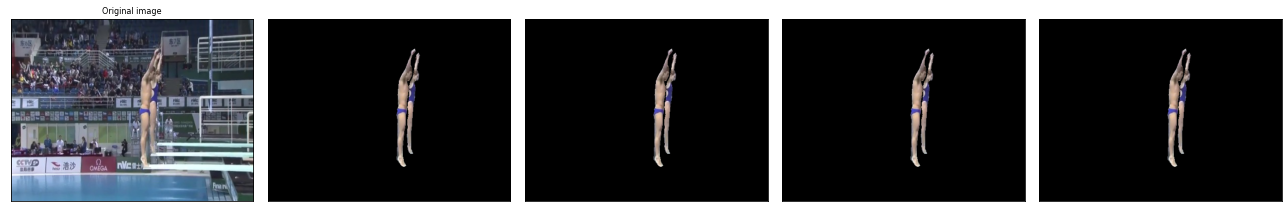

In [49]:
plot([masked_img]*4)

In [51]:
inv_mask = ~mask  # true for bg
blurred_bg_img = F.to_pil_image((inv_mask * to_tensor(blurred_imgs[1]) * 255).type(torch.uint8))

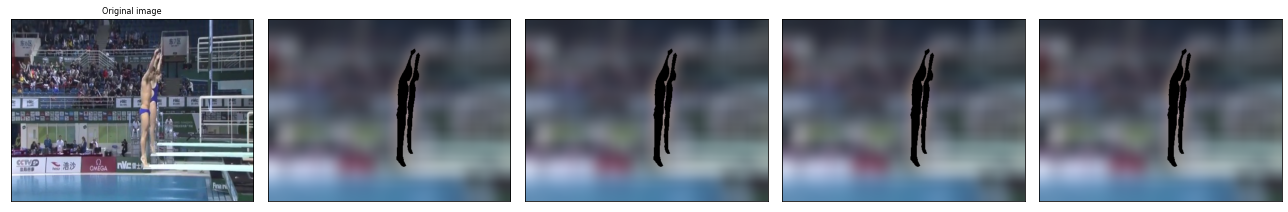

In [52]:
plot([blurred_bg_img]*4)

In [54]:
together = F.to_pil_image(((mask * img_tensor + inv_mask * to_tensor(blurred_imgs[1])) * 255).type(torch.uint8))

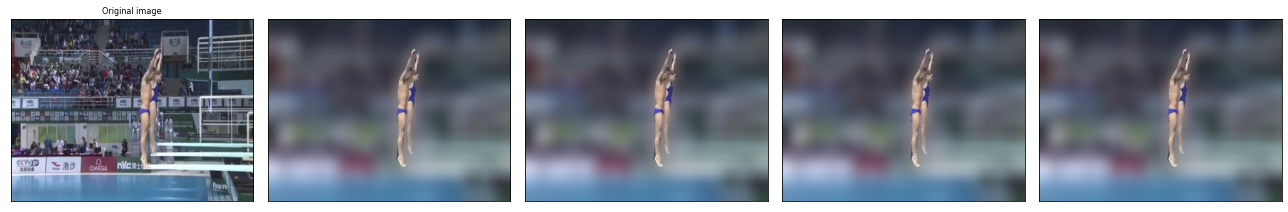

In [55]:
plot([together]*4)

In [ ]:
›